Importação de Bibliotecas

In [10]:
# Importação de bibliotecas
import cv2
from PIL import Image
from matplotlib import pyplot as plt

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [215 222 225]
  [215 222 225]
  [215 222 225]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [215 222 225]
  [215 222 225]
  [215 222 225]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [215 222 225]
  [215 222 225]
  [215 222 225]]

 ...

 [[212 229 239]
  [212 229 239]
  [212 229 239]
  ...
  [141 179 210]
  [140 178 209]
  [135 174 205]]

 [[213 230 240]
  [213 230 240]
  [213 230 240]
  ...
  [144 182 213]
  [142 180 211]
  [137 176 207]]

 [[213 230 240]
  [213 230 240]
  [213 230 240]
  ...
  [141 179 210]
  [140 178 209]
  [137 176 207]]]


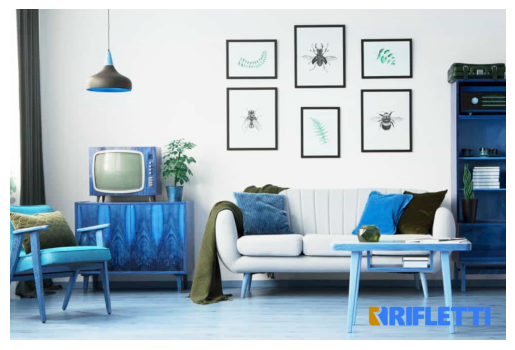

In [11]:
# Carregar uma imagem usando OpenCV
imagem_opencv = cv2.imread('imagem.png')

# Abrir uma imagem usando PIL
imagem_pill = Image.open('imagem.png')

print(imagem_opencv)
plt.imshow(imagem_opencv)
plt.axis('off')
plt.show()



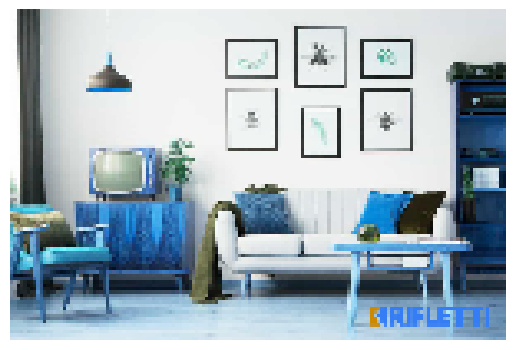

In [10]:
# Redimensionar a imagem usando OpenCV

imagem_redimensionada_opencv = cv2.resize(imagem_opencv, (150,100))

#mostrar a imagem

plt.imshow(imagem_redimensionada_opencv)
plt.axis('off')
plt.show()


In [ ]:
# Redimensionar a imagem usando OpenCV

imagem_redimensionada_opencv = cv2.resize(imagem_pill, (150,100))

#mostrar a imagem

plt.imshow(imagem_redimensionada_opencv)
plt.axis('off')
plt.show()

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1365x910 at 0x18B98AEB260>


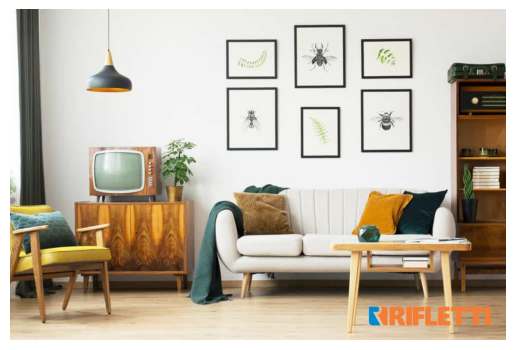

In [13]:
print(imagem_pill)
plt.imshow(imagem_pill)
plt.axis('off')
plt.show()

In [14]:
# Converter a imagem para outro formato usando OpenCV
cv2.imwrite('imagem_conversao.jpg', imagem_opencv)

# Converter a imagem para outro formato usando PIL
imagem_pill.save('imagem_conversao.png', format='PNG')


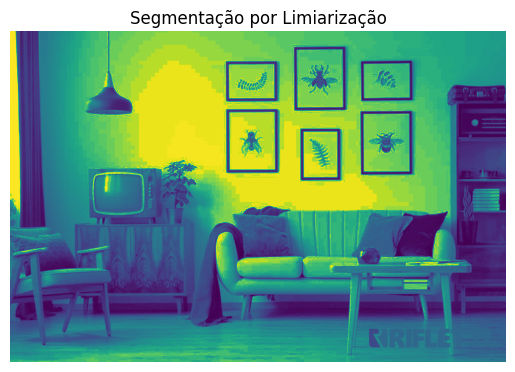

In [22]:
# Carregar a imagem em escala de cinza
imagem = cv2.imread('imagem.jpg', cv2.IMREAD_GRAYSCALE)


# Aplicar equalização
imagem_equalizada = cv2.equalizeHist(imagem)


# Mostrar a imagem segmentada
plt.imshow(imagem_equalizada)
plt.axis('off')
plt.title('Segmentação por Limiarização')
plt.show()


In [ ]:

# Carregar a imagem em escala de cinza
imagem = cv2.imread('imagem.jpg', cv2.IMREAD_GRAYSCALE)


# Aplicar limiarização
imagem_segmentada = cv2.threshold(imagem, 127, 255, cv2.THRESH_BINARY)


# Mostrar a imagem segmentada
plt.imshow(imagem_segmentada, cmap='gray')
plt.axis('off')
plt.title('Segmentação por Limiarização')
plt.show()


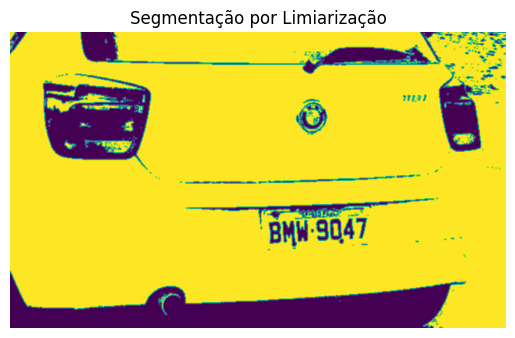

Texto da placa: BMW-9047

O ME A



In [43]:
import cv2
import pytesseract

# Carregar a imagem da placa
imagem_placa = cv2.imread('PlacaCarro.jpg')

# Converter a imagem para escala de cinza
imagem_placa_gray = cv2.cvtColor(imagem_placa, cv2.COLOR_BGR2GRAY)

# Aplicar binarização
_, imagem_placa_bin = cv2.threshold(imagem_placa_gray, 90, 255, cv2.THRESH_BINARY )

# Opcional: Inverter as cores (se necessário)
# imagem_placa_bin = cv2.bitwise_not(imagem_placa_bin)

# Opcional: Aplicar suavização para remover ruído
imagem_placa_bin = cv2.GaussianBlur(imagem_placa_bin, (3, 3), 0)

# Opcional: Salvar imagem binarizada para fins de depuração
cv2.imwrite('placa_bin.png', imagem_placa_bin)

plt.imshow(imagem_placa_bin)
plt.axis('off')
plt.title('Segmentação por Limiarização')
plt.show()
# Configurar o pytesseract para usar o idioma adequado (por exemplo, 'por' para português)
pytesseract.pytesseract.tesseract_cmd = r'C:\Tesseract-OCR\tesseract.exe'
idioma = 'por'

# Realizar o reconhecimento de texto usando pytesseract
texto_placa = pytesseract.image_to_string(imagem_placa_bin, lang=idioma)

# Imprimir o texto reconhecido
print("Texto da placa:", texto_placa)

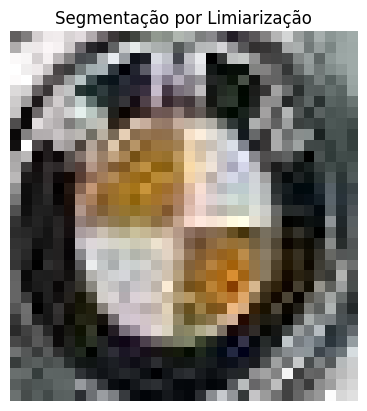

In [41]:
import cv2

# Carregar a imagem original
imagem_original = cv2.imread('PlacaCarro.jpg')

# Converter a imagem para escala de cinza
imagem_gray = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2GRAY)

# Aplicar uma suavização para reduzir o ruído
imagem_blur = cv2.GaussianBlur(imagem_gray, (5, 5), 0)

# Detectar bordas na imagem
bordas = cv2.Canny(imagem_blur, 50, 150)

# Encontrar contornos na imagem
contornos, _ = cv2.findContours(bordas.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Ordenar os contornos pelo tamanho (maior primeiro)
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)

# Isolar a região da placa (supondo que seja o maior contorno)
x, y, w, h = cv2.boundingRect(contornos[0])
placa = imagem_original[y:y+h, x:x+w]

# Salvar a imagem da placa
cv2.imwrite('placa_isolada.png', placa)
plt.imshow(placa)
plt.axis('off')
plt.title('Segmentação por Limiarização')
plt.show()